<div style="font-size: 32px; color: gray; font-weight: bold; text-align: center;">Stock Analysis</div>

---

## Investment Ratios

### Price-earnings ratio

Divide a company's share price by its annual earnings per share to calculate the P/E ratio. This ratio shows how much investors are willing to pay for $1 of a company's earnings. "It is probably the best way of comparing assets in different sectors and of finding true bargains," says Steven Jon Kaplan, CEO of True Contrarian Investments. Higher P/E ratios suggest a company's future earnings are expected to grow and may appear overvalued compared with companies with lower P/Es. That said, a high or low P/E doesn't necessarily indicate a good or bad investment; it offers a snapshot that begs additional inquiry. Given the uncertainty of future cash flows, it can be helpful for investors to rely on historical P/Es and use a mix of other ratios to evaluate and pick stocks.

### Price-sales ratio

Robert Johnson, professor of finance at Creighton University in Omaha, Nebraska, touts the benefits of calculating a stock's price divided by sales per share, commonly referred to as the price-to-sales ratio. "The price-to-sales ratio is used by analysts who want to eliminate some of the distortions that can result in company earnings," Johnson says. It's a useful ratio to determine whether a company has earnings, cash flow or even positive book value since sales is always a positive number. A lower ratio suggests you've found a bargain, or a value stock. Industry consensus says lower P/S stocks have better value because investors are paying less for every dollar of a company's revenues. P/S ratio values can vary across sectors, so to best assess a company's P/S, compare it with industry peers.

### Profit margin ratio

This is the amount of profit a company makes for every unit of sales. Investors calculate this ratio by dividing net profit over revenue. Profit margins are unique to an industry – with grocery chains known for low profit margins, while software companies can claim double-digit ratios. But this information doesn't necessarily mean that it's better to buy a software company than a grocery store stock. A high profit margin means a business can offer products priced higher than its costs, yielding profits through effective pricing strategies. A low profit margin may mean there are inefficient pricing strategies, where a business cannot produce enough profit to cover expenses. Any stock could be a winner with a growing revenue stream and steady profit margins.

### Dividend payout ratio

Companies with rising dividend payments are favored by John Robinson, owner and founder of Nest Egg Guru in Hawaii. The dividend payout ratio is the percentage of net income paid to investors in the form of dividends. This ratio tells investors how much earnings are paid out in dividends versus how much is reinvested back into the company. The higher the percentage, the less money remains to reinvest back into growing the company. "Companies that pay out less than 60% of their earnings as dividends tend to have room for further dividend increases and the ability to withstand temporary earnings downturns without having to reduce or eliminate dividend payments," he says.

### Price-free cash flow ratio

Tim Parker, a partner at Regency Wealth Management in New York City, reveres free cash flow because that is the amount of money left over after a company reinvests in the business to pay dividends, buy back shares or make acquisitions. To determine price-free cash flow, divide the company's share price by the operating free cash flow per share. The ratio measures how much cash a company earns for each share of stock. Investors want to search for companies with growing free cash flow that are selling at a bargain. Parker favors this ratio since free cash flow is harder to manipulate than earnings. A lower ratio indicates a company may be undervalued, while a higher ratio may signal overvaluation.

### Debit-equity ratio


Valuation ratios are important, but so are quality measures, such as debt and liquidity metrics. Divide a company's total liabilities by its shareholder equity to compute the debt-equity ratio. This ratio explains a company's financial leverage, the comparison between borrowed funds and equity or ownership. Think of this ratio like a homeowner's mortgage value versus principal on the home. A greater proportion of debt constrains a company's flexibility to grow as more revenue is directed to pay debt costs. Like most ratios, compare the debt-equity ratio to those of other industry members, as some sectors, such as utilities, have higher typical debt ratios compared with others.

### Quick and current ratios


Sameer Samana, global equity and technical strategist at Wells Fargo Investment Institute in St. Louis, recommends examining the quick ratio and current ratio. These liquidity ratios measure if a company has enough working capital to handle potential downturns and financial setbacks. The current ratio divides current assets by current liabilities to measure how much cash a company has on hand to pay short-term obligations within a year. The quick ratio sums cash, marketable securities and accounts receivables and divides this sum by current liabilities. Higher numbers for these ratios suggest greater liquidity, while lower ratios may suggest a company cannot meet short-term obligations.

### EBITDA-to-sales ratio

This metric is the company's EBITDA – which is an abbreviation for earnings before interest, taxes, depreciation and amortization – divided by its net sales. This ratio is used to evaluate a company's overall profitability or earnings before expenses, by comparing revenue with earnings. "The stability of EBITDA typically determines investors' appetite for the amount of debt it believes the business should have," says Bryan Lee, chief investment officer at Blue Zone Wealth Advisors in Los Angeles. "A more levered company brings higher volatility for how the equity trades. This volatility can amplify returns on the upside but also to the downside," he says. EBITDA margin offers a transparent view into business operations by eliminating noncash or nonoperating expenses like interest costs, taxes and depreciation that may dim profits, giving a more precise view of a company's profitability.

## Libraries

In [1]:
# Libraries
# import yfinance as yf
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
import pandas as pd
import numpy as np
import boto3
from io import StringIO
from sagemaker import get_execution_role
import warnings
warnings.filterwarnings("ignore")
import pickle
from scipy import stats
plt.style.use('seaborn-white')
import numpy as np
import math
import ipywidgets as widgets
from datetime import datetime

In [2]:
# print(plt.style.available)

## Get data

### Retrieve ticker info data from s3

In [3]:
# Read ticker_info from s3

s3 = boto3.client("s3")

#Read the object stored in key 'myList001'
# object = s3.get_object(Bucket="euronext-stocks", Key="ticker_info")
object = s3.get_object(Bucket="euronext-stocks", Key="ticker_info_cac40")
# object = s3.get_object(Bucket="euronext-stocks", Key="ticker_info_test")
serializedObject = object['Body'].read()
ticker_info = pickle.loads(serializedObject) # Deserialize the retrieved object

In [4]:
# Create dataframe of ticker info
df_ticker_info = pd.DataFrame([(ticker,
                               ticker_info[ticker][0],
                               ticker_info[ticker][1],
                               ticker_info[ticker][2],
                              ) for ticker in ticker_info], columns=["Ticker", "Name", "Sector", "Industry"])


df_ticker_info.set_index("Ticker", inplace=True)
df_ticker_info

,Name,Sector,Industry
Ticker,,,
EURUSD=X,Missing,Missing,Missing
^FCHI,Missing,Missing,Missing
AI.PA,L'Air Liquide S.A.,Basic Materials,Chemicals
AIR.PA,Airbus SE,Industrials,Aerospace & Defense
ALO.PA,Alstom SA,Industrials,Specialty Industrial Machinery
MT.PA,Missing,Missing,Missing
ATO.PA,Atos SE,Technology,Information Technology Services
CS.PA,AXA SA,Financial Services,Insurance—Diversified
BNP.PA,BNP Paribas SA,Financial Services,Banks—Regional


### Retrieve all prices and volumes from s3

In [5]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_data = pd.read_csv(data_location, header=[0, 1],)
df_data.set_index(df_data["Unnamed: 0_level_0"]["Unnamed: 0_level_1"], drop=True, inplace=True)
df_data.index.name = "Date"
df_data.drop("Unnamed: 0_level_0", axis=1, inplace=True)
df_data.drop(df_data.index[0], inplace=True)
df_data.index = pd.to_datetime(df_data.index)
df_data.interpolate(method='linear', inplace=True) # use linear interpolation for missing values

In [6]:
df_data.head(3)

Adj Close                                                          \
              ACA.PA      AI.PA      AIR.PA     ALO.PA     ATO.PA      BN.PA   
Date                                                                           
2019-05-20  9.733603  98.601425  115.306343  34.364090  67.940483  63.734703   
2019-05-21  9.852306  98.775711  114.512329  34.874493  69.750130  64.331024   
2019-05-22  9.654469  99.952133  114.473595  35.094494  71.618790  64.168381   

                                                         ...     Volume  \
               BNP.PA      CA.PA      CAP.PA      CS.PA  ...     SGO.PA   
Date                                                     ...              
2019-05-20  37.038956  16.346972  100.523682  18.499477  ...  1764454.0   
2019-05-21  37.346058  16.404465  101.540535  18.635651  ...  1733715.0   
2019-05-22  36.943504  16.346972  103.332138  18.515982  ...  1635120.0   

                                                                      \
           STLA.PA     STM.PA      SU.PA    TEP.PA URW.PA     VIE.PA   
Date                                                                   
2019-05-20     NaN  8129451.0  1247966.0   79010.0    NaN  1195119.0   
2019-05-21     NaN  4987101.0  1176278.0   78094.0    NaN  1590605.0   
2019-05-22     NaN  2678087.0  1167188.0  265212.0    NaN  1287421.0   

                                             
               VIV.PA    WLN.PA       ^FCHI  
Date                                         
2019-05-20  2633619.0  464400.0  88787600.0  
2019-05-21  2150535.0  447378.0  79280900.0  
2019-05-22  2295662.0  428106.0  69422500.0  

[3 rows x 252 columns]

In [7]:
# Create various dataframes for different use cases
df_raw_prices = df_data["Adj Close"]
df_daily_returns = df_raw_prices.pct_change()

In [8]:
df_raw_prices.head(3)

,ACA.PA,AI.PA,AIR.PA,ALO.PA,ATO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,...,SGO.PA,STLA.PA,STM.PA,SU.PA,TEP.PA,URW.PA,VIE.PA,VIV.PA,WLN.PA,^FCHI
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-20,9.733603,98.601425,115.306343,34.364090,67.940483,63.734703,37.038956,16.346972,100.523682,18.499477,...,31.249226,NaN,13.896537,68.586166,161.809845,NaN,18.980263,23.873327,50.950001,5358.589844
2019-05-21,9.852306,98.775711,114.512329,34.874493,69.750130,64.331024,37.346058,16.404465,101.540535,18.635651,...,31.125061,NaN,14.475150,69.497856,163.944016,NaN,19.207800,23.960810,51.250000,5385.459961
2019-05-22,9.654469,99.952133,114.473595,35.094494,71.618790,64.168381,36.943504,16.346972,103.332138,18.515982,...,30.950302,NaN,14.274107,69.440880,169.182465,NaN,19.293125,23.863605,52.299999,5378.979980


In [9]:
df_daily_returns.head(3)

,ACA.PA,AI.PA,AIR.PA,ALO.PA,ATO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,...,SGO.PA,STLA.PA,STM.PA,SU.PA,TEP.PA,URW.PA,VIE.PA,VIV.PA,WLN.PA,^FCHI
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-21,0.012195,0.001768,-0.006886,0.014853,0.026636,0.009356,0.008291,0.003517,0.010116,0.007361,...,-0.003973,NaN,0.041637,0.013293,0.013189,NaN,0.011988,0.003664,0.005888,0.005014
2019-05-22,-0.020080,0.011910,-0.000338,0.006308,0.026791,-0.002528,-0.010779,-0.003505,0.017644,-0.006422,...,-0.005615,NaN,-0.013889,-0.000820,0.031953,NaN,0.004442,-0.004057,0.020488,-0.001203


In [10]:
# Create df_prices dataframe with sector and industry columns
# Use ticker metadata in column headings of df_prices dataframe
df_prices = df_data["Adj Close"]
col_tuples = [(ticker_info[ticker][1], ticker_info[ticker][2], ticker) for ticker in ticker_info] # sector and industry
df_prices.columns = col_tuples
df_prices.columns = pd.MultiIndex.from_tuples(df_prices.columns,)

# Tidy up ordering and grouping on column headers
new_columns = df_prices.columns.sort_values(ascending=[True, True, True])
df_prices = df_prices[new_columns]

In [11]:
df_prices.head(3)

Basic Materials Communication Services               \
                 Chemicals   Advertising Agencies Broadcasting   
                     AI.PA                 PUB.PA       VIV.PA   
Date                                                             
2019-05-20      115.306343              12.558084    50.950001   
2019-05-21      114.512329              12.490617    51.250000   
2019-05-22      114.473595              12.477123    52.299999   

                             Consumer Cyclical                          \
           Telecom Services Auto Manufacturers            Luxury Goods   
                     ORA.PA             RNO.PA    STLA.PA       KER.PA   
Date                                                                     
2019-05-20              NaN          44.463112  31.249226    94.271965   
2019-05-21              NaN          44.657509  31.125061    95.904182   
2019-05-22              NaN          44.922592  30.950302    95.432442   

                                                 Consumer Defensive  ...  \
                                  Beverages—Wineries & Distilleries  ...   
                 MC.PA     RMS.PA                             RI.PA  ...   
Date                                                                 ...   
2019-05-20  318.557739  18.839725                        231.230118  ...   
2019-05-21  323.480164  18.956139                        231.325989  ...   
2019-05-22  324.590118  18.794664                        233.051605  ...   

               Missing                               \
               Missing                                
                 ML.PA      MT.PA URW.PA      ^FCHI   
Date                                                  
2019-05-20  102.040962  63.734703    NaN  98.601425   
2019-05-21  103.557388  64.331024    NaN  98.775711   
2019-05-22  103.557388  64.168381    NaN  99.952133   

                                Technology                            \
           Information Technology Services            Semiconductors   
                                    ATO.PA     CAP.PA         STM.PA   
Date                                                                   
2019-05-20                       37.038956  83.614937            NaN   
2019-05-21                       37.346058  84.066292            NaN   
2019-05-22                       36.943504  84.085098            NaN   

                                                                    Utilities  
           Software—Application Software—Infrastructure Utilities—Diversified  
                         DSY.PA                  WLN.PA               ENGI.PA  
Date                                                                           
2019-05-20            12.060001             5358.589844              1.116532  
2019-05-21            11.739863             5385.459961              1.116857  
2019-05-22            11.726143             5378.979980              1.116203  

[3 rows x 42 columns]

### Retrieve ratio data from s3

#### Retrieve YF ratio data

In [12]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_ratio_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_ratio_data = pd.read_csv(data_location,)
df_ratio_data.set_index(df_ratio_data["Unnamed: 0"], drop=True, inplace=True)
df_ratio_data.index.name = "Metric"
df_ratio_data.drop("Unnamed: 0", axis=1, inplace=True)
# df_data.drop(df_data.index[0], inplace=True)
# df_data.index = pd.to_datetime(df_data.index)
# df_data.interpolate(method='linear', inplace=True) # use linear interpolation for missing values

In [13]:
df_ratio_data

,EURUSD=X,^FCHI,AI.PA,AIR.PA,ALO.PA,MT.PA,ATO.PA,CS.PA,BNP.PA,EN.PA,...,STLA.PA,STM.PA,TEP.PA,HO.PA,FP.PA,URW.PA,VIE.PA,DG.PA,VIV.PA,WLN.PA
Metric,,,,,,,,,,,,,,,,,,,,,
profitMargins,NaN,NaN,1.188700e-01,-5.830000e-03,2.812000e-02,NaN,4.919000e-02,2.816000e-02,1.838800e-01,2.002000e-02,...,3.578000e-02,1.161400e-01,5.652000e-02,2.845000e-02,NaN,NaN,5.960000e-03,2.815000e-02,8.949999e-02,5.957000e-02
payoutRatio,NaN,NaN,5.253000e-01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,5.840000e-01,0.000000e+00,9.290000e-01,...,0.000000e+00,1.217000e-01,4.348000e-01,1.762000e-01,NaN,NaN,2.631600e+00,5.682000e-01,4.762000e-01,0.000000e+00
sharesOutstanding,NaN,NaN,4.719200e+08,7.855880e+08,3.712050e+08,NaN,1.092480e+08,2.386560e+09,1.248800e+09,3.807380e+08,...,3.124240e+09,8.995120e+08,5.871710e+07,2.129950e+08,NaN,NaN,5.672170e+08,5.669920e+08,1.086270e+09,2.792600e+08
trailingEps,NaN,NaN,5.140000e+00,-3.800000e-01,1.800000e+00,NaN,5.046000e+00,1.250000e+00,5.684000e+00,1.830000e+00,...,2.330000e+00,1.136000e+00,5.520000e+00,2.270000e+00,NaN,NaN,2.750000e-01,2.200000e+00,1.260000e+00,8.140000e-01
forwardEps,NaN,NaN,5.750000e+00,5.580000e+00,NaN,NaN,9.620000e+00,2.800000e+00,6.110000e+00,2.930000e+00,...,NaN,1.340000e+00,8.010000e+00,6.360000e+00,NaN,NaN,NaN,5.830000e+00,1.050000e+00,1.170000e+00
Total Cash From Operating Activities,NaN,NaN,5.205700e+09,-5.420000e+09,NaN,NaN,1.219000e+09,2.553400e+10,1.393240e+11,3.406000e+09,...,6.202000e+09,2.093000e+09,9.890000e+08,1.345600e+09,1.480300e+10,NaN,2.725000e+09,6.675000e+09,1.226000e+09,5.113000e+08
Total Liab,NaN,NaN,2.297250e+10,1.036390e+11,NaN,NaN,1.125600e+10,7.191930e+11,2.371142e+12,2.882000e+10,...,4.963600e+10,5.948000e+09,4.615000e+09,2.649790e+10,1.600470e+11,NaN,3.704920e+10,6.814100e+10,2.169100e+10,9.283600e+09
Total Stockholder Equity,NaN,NaN,1.854230e+10,6.445000e+09,NaN,NaN,6.861000e+09,7.161000e+10,1.127990e+11,1.034000e+10,...,2.129400e+10,8.448000e+09,2.409000e+09,5.114900e+09,1.037020e+11,NaN,7.216200e+09,2.086300e+10,1.575900e+10,9.480600e+09
Total Current Assets,NaN,NaN,6.366300e+09,5.840000e+10,NaN,NaN,7.816000e+09,1.268810e+11,1.165380e+12,1.921400e+10,...,3.525800e+10,7.610000e+09,2.680000e+09,1.742650e+10,7.967900e+10,NaN,1.762030e+10,3.203900e+10,8.433000e+09,4.606100e+09


#### Retrieve Pre_calculated Trailing PE

In [14]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_trailing_pe_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_trailing_pe_data = pd.read_csv(data_location,)
df_trailing_pe_data.set_index(df_trailing_pe_data["Date"], drop=True, inplace=True)
df_trailing_pe_data.index.name = "Date"
df_trailing_pe_data.drop("Date", axis=1, inplace=True)

In [15]:
df_trailing_pe_data.head(3)

,EURUSD=X,^FCHI,AI.PA,AIR.PA,ALO.PA,MT.PA,ATO.PA,CS.PA,BNP.PA,EN.PA,...,STLA.PA,STM.PA,TEP.PA,HO.PA,FP.PA,URW.PA,VIE.PA,DG.PA,VIV.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-20,NaN,NaN,19.183157,-303.437745,19.091161,NaN,13.464226,14.799582,6.516354,15.485495,...,NaN,12.232867,29.313378,41.529500,NaN,NaN,69.019137,38.006789,18.947085,62.592139
2019-05-21,NaN,NaN,19.217064,-301.348234,19.374718,NaN,13.822856,14.908521,6.570383,15.557099,...,NaN,12.742210,29.700003,42.248539,NaN,NaN,69.846545,38.211951,19.016516,62.960688
2019-05-22,NaN,NaN,19.445940,-301.246302,19.496941,NaN,14.193181,14.812785,6.499561,15.428213,...,NaN,12.565235,30.648997,42.040723,NaN,NaN,70.156819,38.220499,18.939369,64.250613


#### Retrieve Pre_calculated Forward PE

In [16]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_forward_pe_data.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_forward_pe_data = pd.read_csv(data_location,)
df_forward_pe_data.set_index(df_forward_pe_data["Date"], drop=True, inplace=True)
df_forward_pe_data.index.name = "Date"
df_forward_pe_data.drop("Date", axis=1, inplace=True)

In [17]:
df_forward_pe_data.head(3)

,EURUSD=X,^FCHI,AI.PA,AIR.PA,ALO.PA,MT.PA,ATO.PA,CS.PA,BNP.PA,EN.PA,...,STLA.PA,STM.PA,TEP.PA,HO.PA,FP.PA,URW.PA,VIE.PA,DG.PA,VIV.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-20,NaN,NaN,17.148074,20.664219,NaN,NaN,7.062420,6.606956,6.062022,9.671828,...,NaN,10.370550,20.200979,14.822636,NaN,NaN,NaN,14.342185,22.736502,43.547009
2019-05-21,NaN,NaN,17.178385,20.521923,NaN,NaN,7.250533,6.655590,6.112284,9.716550,...,NaN,10.802351,20.467418,15.079274,NaN,NaN,NaN,14.419604,22.819819,43.803419
2019-05-22,NaN,NaN,17.382980,20.514981,NaN,NaN,7.444781,6.612851,6.046400,9.636051,...,NaN,10.652319,21.121406,15.005101,NaN,NaN,NaN,14.422830,22.727243,44.700854


## Slicing

In [18]:
# Get all raw prices and volume data for a particular stock
df_data.xs("SU.PA", axis=1, level=1, drop_level=True)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-05-20,68.586166,72.220001,72.720001,71.440002,72.620003,1247966.0
2019-05-21,69.497856,73.180000,73.379997,72.419998,72.419998,1176278.0
2019-05-22,69.440880,73.120003,73.639999,72.540001,73.239998,1167188.0
2019-05-23,68.282265,71.900002,72.760002,71.519997,72.559998,1373243.0
2019-05-24,70.181633,73.900002,73.900002,72.360001,72.459999,1401751.0
...,...,...,...,...,...,...
2021-05-12,127.860001,127.860001,129.639999,127.260002,128.839996,808892.0
2021-05-13,127.879997,127.879997,128.559998,125.019997,126.580002,604444.0
2021-05-14,131.440002,131.440002,131.440002,127.879997,128.960007,832397.0


In [19]:
df_data.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object', name='Date', length=513)

In [20]:
# Filter by date
# df_prices.loc['2021-01-01':'2021-01-31']

In [21]:
# Get sectors
sectors = df_prices.columns.get_level_values(0).unique()[2:].to_list()
sectors.sort()
print(sectors) # full dataset

# df_prices.columns.get_level_values(0).unique().to_list() # test dataset

['Consumer Cyclical', 'Consumer Defensive', 'Financial Services', 'Healthcare', 'Industrials', 'Missing', 'Technology', 'Utilities']


In [22]:
# Get industries
industries = df_prices.columns.get_level_values(1).unique()[2:].to_list()
industries.sort() # full dataset
print(industries)

# df_prices.columns.get_level_values(1).unique().to_list() # test data

['Aerospace & Defense', 'Auto Manufacturers', 'Banks—Regional', 'Beverages—Wineries & Distilleries', 'Broadcasting', 'Building Products & Equipment', 'Consulting Services', 'Drug Manufacturers—General', 'Engineering & Construction', 'Grocery Stores', 'Household & Personal Products', 'Information Technology Services', 'Insurance—Diversified', 'Luxury Goods', 'Medical Instruments & Supplies', 'Missing', 'Packaged Foods', 'Semiconductors', 'Software—Application', 'Software—Infrastructure', 'Specialty Industrial Machinery', 'Telecom Services', 'Utilities—Diversified', 'Waste Management']


In [23]:
# Get latest values for all stocks in a particular sector/industry combination
sector = "Utilities"
industry = "Utilities—Renewable"
# df_prices[sector][industry].iloc[107].sort_values(ascending=False)

In [24]:
# Get data for all stocks in a particular sector
# df_prices.xs("Energy", axis=1, level=0, drop_level=False)

In [25]:
# Get data for all stocks in a particular industry
# df_prices.xs("Utilities—Renewable", axis=1, level=1, drop_level=False)
# df_prices.xs("Airports & Air Services", axis=1, level=1, drop_level=False)

In [26]:
# Get stock tickers in a particular sector
print([item[2] for item in df_prices.xs("Financial Services", axis=1, level=0, drop_level=False).columns.to_list()])

['ACA.PA', 'BNP.PA', 'GLE.PA', 'CS.PA']


In [27]:
# Get stock tickers in a particular industry
[item[2] for item in df_prices.xs("Aerospace & Defense", axis=1, level=1, drop_level=False).columns.to_list()]

['AIR.PA', 'HO.PA', 'SAF.PA']

In [28]:
# Get list of dicts of ticker and ticker names for a sector. Can use this to generate tickers_to_plot below
sector = "Financial Services"
[{ticker:ticker_info[ticker][0]} for ticker in [item[2] for item in df_prices.xs(sector, axis=1, level=0, drop_level=False).columns.to_list()]]

[{'ACA.PA': 'Crédit Agricole S.A.'},
 {'BNP.PA': 'BNP Paribas SA'},
 {'GLE.PA': 'Société Générale Société anonyme'},
 {'CS.PA': 'AXA SA'}]

In [29]:
# Get list of dicts of ticker and ticker names for an industry. Can use this to generate tickers_to_plot below
industry = "Software—Infrastructure"
[{ticker:ticker_info[ticker][0]} for ticker in [item[2] for item in df_prices.xs(industry, axis=1, level=1, drop_level=False).columns.to_list()]]

[{'WLN.PA': 'Worldline SA'}]

## Plotting

### Reuseable components

In [30]:
# List of tickers in alphabetical order
ticker_list = list(df_raw_prices.columns)
ticker_list.sort()

### Plot functions

In [31]:
# Heatmap displaying correlation of closing price between tickers
def plot_corr_daily_returns(tickers, start_date, end_date, ma_days):
    
#     corr = df_daily_returns.loc[start_date:end_date][tickers].corr()
#     corr = df_daily_returns.loc[start_date:end_date][tickers].rolling(window=ma_days, center=False).mean().corr()
    corr = df_raw_prices.loc[start_date:end_date][tickers].rolling(window=ma_days, center=False).mean().corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(15,12))
    sns.heatmap(corr, cmap="rocket_r", ax=ax, square=True, annot=True, fmt=".2g", annot_kws={"size":8}, mask=mask) # plot heatmap with seaborn
    # icefire
    
    plt.title(f"Correlation of {ma_days} day Moving Averages of Close Prices")
    plt.tight_layout()

### Single stock price with moving averages

In [32]:
# Plot a single stock Close price and several moving averages

ticker_list = list(df_raw_prices.columns)
ticker_list.sort()
@widgets.interact(
    ticker=ticker_list,
    start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
)
def plot_single_ticker(ticker, start_date, end_date):
    
    base = df_raw_prices.loc[start_date:end_date][ticker]
    rolling_20 = np.round(base.rolling(window=20, center=False).mean(), 2)
    rolling_50 = np.round(base.rolling(window=50, center=False).mean(), 2)
    rolling_200 = np.round(base.rolling(window=200, center=False).mean(), 2)

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(base, label="Close", linewidth=4, alpha=.2)
    ax.plot(rolling_20, label="20d M.A.", linestyle="dashed", linewidth=2)
    ax.plot(rolling_50, label="50d M.A.", linestyle="dashed", linewidth=2)
    ax.plot(rolling_200, label="200d M.A.", linestyle="dashed", linewidth=2)
    ax.set_ylabel("Close Price")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.set_title(f"{ticker}\n{start_date} to {end_date}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

interactive(children=(Dropdown(description='ticker', options=('ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'ATO.PA',…

### Trailing P/E ratio

In [33]:
# Plot Trailing Price-Earnings Ratio for multiple stocks
# Plot multiple stocks or indices against each other and customize the legend labels

ticker_list = list(df_trailing_pe_data.columns)
ticker_list.sort()
@widgets.interact(
    tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["SU.PA"], description="Tickers", disabled=False),
#     tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["^FCHI"], description="Tickers", disabled=False),
    start_date=widgets.Text(value="2021-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2021-12-31", description="end date", continuous_update=False),
)
def pe_ratio(tickers_to_plot, start_date, end_date):
    """
    Function to plot a stock against an index (or other stock) and customize the legend labels.
    Input is a list of key:pairs (python dicts) in the form ticker:ticker description
    """
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    # Baseline the data at start date and convert to percentages
    df_plot = df_trailing_pe_data.loc[start_date:end_date]
    
    for ticker in tickers_to_plot:
        df_plot[ticker].plot(ax=ax, legend=ticker)
        
    lines, labels = ax.get_legend_handles_labels()
    
#     mylabels = [list(ticker.values())[0] for ticker in tickers_to_plot]
    
#     ax.legend(lines, mylabels, loc='best')  # legend for first two lines only
    ax.legend()
    ax.set_xlabel(""); ax.set_ylabel("Trailing P/E Ratio")
    ax.set_title(f"Trailing Price-Earnings Ratio comparison\n{start_date} to {end_date}")
    plt.grid()

interactive(children=(SelectMultiple(description='Tickers', index=(35,), options=('ACA.PA', 'AI.PA', 'AIR.PA',…

### Foward P/E ratio

In [36]:
# Plot Forward Price-Earnings Ratio for multiple stocks
# Plot multiple stocks or indices against each other and customize the legend labels

ticker_list = list(df_forward_pe_data.columns)
ticker_list.sort()
@widgets.interact(
    tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["SU.PA"], description="Tickers", disabled=False),
#     tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["^FCHI"], description="Tickers", disabled=False),
    start_date=widgets.Text(value="2021-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2021-12-31", description="end date", continuous_update=False),
)
def pe_ratio(tickers_to_plot, start_date, end_date):
    """
    Function to plot a stock against an index (or other stock) and customize the legend labels.
    Input is a list of key:pairs (python dicts) in the form ticker:ticker description
    """
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    # Baseline the data at start date and convert to percentages
    df_plot = df_forward_pe_data.loc[start_date:end_date]
    
    for ticker in tickers_to_plot:
        df_plot[ticker].plot(ax=ax, legend=ticker)
        
    lines, labels = ax.get_legend_handles_labels()
    
#     mylabels = [list(ticker.values())[0] for ticker in tickers_to_plot]
    
#     ax.legend(lines, mylabels, loc='best')  # legend for first two lines only
    ax.legend()
    ax.set_xlabel(""); ax.set_ylabel("Foward P/E Ratio")
    ax.set_title(f"Forward Price-Earnings Ratio comparison\n{start_date} to {end_date}")
    plt.grid()

interactive(children=(SelectMultiple(description='Tickers', index=(35,), options=('ACA.PA', 'AI.PA', 'AIR.PA',…

### Return comparisons

interactive(children=(SelectMultiple(description='Tickers', options=('ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'A…

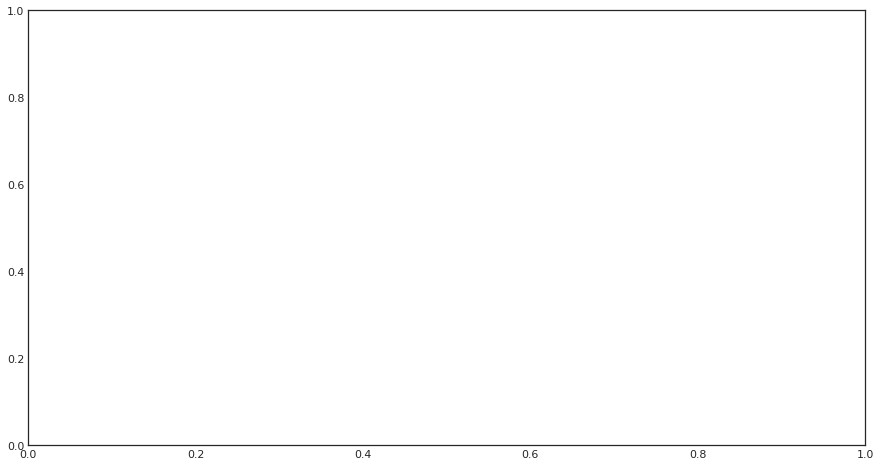

In [37]:
# Plot multiple stocks or indices against each other and customize the legend labels

ticker_list = list(df_raw_prices.columns)
ticker_list.sort()
@widgets.interact(
    tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], description="Tickers", disabled=False),
#     tickers_to_plot=widgets.SelectMultiple(options=ticker_list[:-1], value=["^FCHI"], description="Tickers", disabled=False),
    start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
)
def plot_tickers(tickers_to_plot, start_date, end_date):
    """
    Function to plot a stock against an index (or other stock) and customize the legend labels.
    Input is a list of key:pairs (python dicts) in the form ticker:ticker description
    """
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    # Baseline the data at start date and convert to percentages
    df_plot = df_raw_prices.loc[start_date:end_date]
    df_plot = (df_plot/df_plot.iloc[0] - 1) * 100
    
    for ticker in tickers_to_plot:
        df_plot[ticker].plot(ax=ax, legend=ticker)
    
    df_plot["^FCHI"].plot(ax=ax, legend="^FCHI", linewidth=4, alpha=.2, color="gray")
        
    lines, labels = ax.get_legend_handles_labels()
    
#     mylabels = [list(ticker.values())[0] for ticker in tickers_to_plot]
    
#     ax.legend(lines, mylabels, loc='best')  # legend for first two lines only
    ax.legend()
    ax.set_xlabel(""); ax.set_ylabel("Return %")
    ax.set_title(f"% Returns comparison\n{start_date} to {end_date}")
    plt.grid()

### Alpha & Beta

In [ ]:
# Regression plot

@widgets.interact(
    ticker1=ticker_list,
    ticker2=ticker_list,
    start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
)
def regression_plot(ticker1, ticker2, start_date, end_date):
    
    # Transform data for alpha, beta and plotting
    data = pd.DataFrame(
        {
            ticker1:[item[0] for item in df_prices.loc[start_date:end_date].xs(ticker1, axis=1, level=2, drop_level=False).values.tolist()],
            ticker2:[item[0] for item in df_prices.loc[start_date:end_date].xs(ticker2, axis=1, level=2, drop_level=False).values.tolist()]
        }
    )

    data_returns = (data/data.iloc[0] - 1) * 100
    
    (beta, alpha) = stats.linregress(data_returns[ticker2],
                    data_returns[ticker1])[0:2]

#     fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(12,8))
    ax = sns.regplot(x=ticker2, y=ticker1, data=data_returns)
    ax.set_title(f"Regression plot for\n{ticker2} vs {ticker1}\n{start_date} to {end_date}\nBeta={round(beta, 4)}\nAlpha={round(alpha,5)}")
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(10))
    plt.gca().set_aspect("equal")
    plt.grid()
    plt.show()

### Volatility

In [ ]:
# Compare volatility of 2 tickers

ticker_list = list(df_raw_prices.columns)
ticker_list.sort()
@widgets.interact(
    ticker1=ticker_list,
    ticker2=ticker_list,
    start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
)
def plot_vol_comparison(ticker1, ticker2, start_date, end_date):
    """
    1. 2-year vol comparison. (*** Could update to have dynamic date ranges ***)
    2. Uses standard deviation for vol calculation.
    """
    tickers = [ticker1, ticker2]
    fig, ax = plt.subplots(figsize=(10,6))
    for ticker in tickers:
        mean = np.mean(df_daily_returns.loc[start_date:end_date][ticker])
        vol = np.std(df_daily_returns.loc[start_date:end_date][ticker])
        df_daily_returns.loc[start_date:end_date][ticker].hist(bins=50, ax=ax, label=f"{ticker} µ={mean:.3f} vol={vol:.3f}", alpha=.5)
    plt.legend()
    plt.title(f"Compare volatility of daily returns\n{start_date} to {end_date}")
    plt.tight_layout()

### Correlation of moving average returns

In [ ]:
start_date = '2021-01-01'
end_date = '2021-12-31'
ma_days = 20

In [ ]:
# Make list of tickers to plot
# tickers = ['EC.PA', 'LFDE.PA', 'MAU.PA', 'CGG.PA', 'CLB.AS', 'FTI.PA', 'FUR.AS', 'GTT.PA', 'SBMO.AS', 'SLB.PA', 'TE.PA', 'VPK.AS', 'RDSA.AS', 'RDSB.AS', 'EURN.BR', 'EXM.BR', 'FLUX.BR', 'DPAM.PA', 'ES.PA']
tickers = df_raw_prices.columns

In [ ]:
# Plot correlation of closing price between tickers
plot_corr_daily_returns(tickers, start_date, end_date, ma_days)

### Compare weekly patterns

In [ ]:
stock_to_compare = "^FCHI"
start_date = "2021-01-01"
end_date = "2021-12-31"

In [ ]:
def plot_comparison_of_weeks(stock_to_compare):

    df_compare_weeks = pd.DataFrame(df_raw_prices.loc[start_date:end_date][stock_to_compare])

    # Get day of week for each date in the index
    df_compare_weeks["weekday"] = df_compare_weeks.index.to_series().dt.day_name()
    # Get week number for each date in the index
    df_compare_weeks["weeknum"] = df_compare_weeks.index.to_series().dt.week
    df_compare_weeks = df_compare_weeks.pivot_table(index="weeknum", columns="weekday", values=stock_to_compare).transpose()
    df_compare_weeks = df_compare_weeks.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
    
    df_compare_weeks = (df_compare_weeks/df_compare_weeks.iloc[0] - 1) * 100
    
    colors = ["white" if df_compare_weeks[col].iloc[0] < df_compare_weeks[col].iloc[4] else "red" for col in df_compare_weeks.columns]
    fig, ax = plt.subplots(figsize=(15,7)) 

    df_compare_weeks.plot(ax=ax, color=colors, alpha=.6, linewidth=4)
    ax.get_legend().remove()
    ax.set_facecolor("black")
    plt.xlabel(None)
    return colors

In [ ]:
colors = plot_comparison_of_weeks(stock_to_compare)

In [ ]:
pd.Series(colors).value_counts()

### Trade Recommendations

In [ ]:
# Create trade recommendations

# Create moving averages
rolling_20 = np.round(df_raw_prices.rolling(window=20, center=False).mean(), 2)
rolling_50 = np.round(df_raw_prices.rolling(window=50, center=False).mean(), 2)

# Creates df where if M.A.20 < M.A.50 then True else False
rolling_diff = pd.DataFrame(np.where(rolling_20<rolling_50, True, False), columns=df_raw_prices.columns, index=df_raw_prices.index)

# Apply following to rolling_diff dataframe:

# If yesterday == True and today == False
# Then "Sell"
# Elif yesterday == False and today == True
# Then "Buy"
# Else None
sell_opps = rolling_diff < rolling_diff.shift(periods=-1)
buy_opps = rolling_diff > rolling_diff.shift(periods=-1)

# Replace boolean values with "Buy"/"Sell" strings, then merge into single dataframe
sell_opps.replace(to_replace=True, value="Sell", inplace=True)
sell_opps.replace(to_replace=False, value=np.nan, inplace=True)
buy_opps.replace(to_replace=True, value="Buy", inplace=True)
buy_opps.replace(to_replace=False, value=np.nan, inplace=True)
all_opps = sell_opps.mask(buy_opps=="Buy", buy_opps) # Merge buy_opps with sell_opps

In [ ]:
# Get all historic recommendations for a given ticker
ticker = "SU.PA"
all_opps[ticker][~all_opps[ticker].isnull()]

In [ ]:
# Get historic price on particular date for particular ticker
# df_raw_prices[ticker]["2020-03-11"]

In [ ]:
# Total counts
# buy_opps
# sell_opps
# print(f"There are {all_opps[all_opps=='Sell'].count().sum()} sell opportunities.")
# print(f"There are {all_opps[all_opps=='Buy'].count().sum()} buy opportunities.")
# all_opps.count().sum() # Counts values that are neither NA or np.nan

# all_opps[all_opps=='Sell'].loc["2021-04-26"].count().sum()
# all_opps[all_opps=='Buy'].loc["2021-04-26"].count().sum()

In [ ]:
opportunity_date = "2021-05-17"

In [ ]:
# Generate Buy and Sell recommendations
recommend_buy = list(all_opps.loc[opportunity_date][all_opps.loc[opportunity_date]=="Buy"].index)
recommend_sell = list(all_opps.loc[opportunity_date][all_opps.loc[opportunity_date]=="Sell"].index)

In [ ]:
# Function to plot recommendations
def plot_recommendation(ticker, start_date, end_date, ax):
    
    base = df_raw_prices.loc[start_date:end_date][ticker]
    rolling_20 = np.round(base.rolling(window=20, center=False).mean(), 2)
    rolling_50 = np.round(base.rolling(window=50, center=False).mean(), 2)
    rolling_200 = np.round(base.rolling(window=200, center=False).mean(), 2)

    ax = ax
    ax.plot(base, label="Close", linewidth=4, alpha=.2)
    ax.plot(rolling_20, label="20d M.A.", linestyle="dashed", linewidth=2)
    ax.plot(rolling_50, label="50d M.A.", linestyle="dashed", linewidth=2)
    ax.plot(rolling_200, label="200d M.A.", linestyle="dashed", linewidth=2)
    ax.set_ylabel("Close Price")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.set_title(f"{ticker}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

In [ ]:
# Plot Buy recommendations
if math.ceil(len(recommend_buy)/3) == 1:
    height = (math.ceil(len(recommend_buy))/3*4)+3
else:
    height = (math.ceil(len(recommend_buy))/3*4)

fig = plt.figure(figsize=(15, height))
for buy in recommend_buy:
    n = recommend_buy.index(buy)+1
#     print(n)
    ax = fig.add_subplot(math.ceil(len(recommend_buy)/3), 3, n)
    plot_recommendation(buy, "2021-01-01", opportunity_date, ax=ax)
plt.suptitle(f"BUY RECOMMENDATIONS {opportunity_date}\n")
plt.tight_layout()

In [ ]:
# Plot Sell recommendations
if math.ceil(len(recommend_sell)/3) == 1:
    height = (math.ceil(len(recommend_sell))/3*4)+3
else:
    height = (math.ceil(len(recommend_sell))/3*4)

fig = plt.figure(figsize=(15,height))
for sell in recommend_sell:
    n = recommend_sell.index(sell)+1
#     print(n)
    ax = fig.add_subplot(math.ceil(len(recommend_sell)/3), 3, n)
    plot_recommendation(sell, "2021-01-01", opportunity_date, ax=ax)
plt.suptitle(f"SELL RECOMMENDATIONS {opportunity_date}\n")
plt.tight_layout()

### Back-test trading strategy

In [ ]:
# Function to run Back-testing

def run_backtest(start_date, end_date):

    # Generate Buy trades
    index = all_opps.index
    buy_trades = {}
    for ticker in all_opps.columns:
        condition = all_opps[ticker] == "Buy"
        buy_indices = index[condition]
        buy_indices_list = buy_indices.tolist()
        buy_ind_dates = [str(ts.year) + "-" + str(ts.month) + "-" + str(ts.day) for ts in buy_indices_list]
        df_raw_prices.loc[buy_ind_dates][ticker]
        buy_prices = list(df_raw_prices.loc[buy_ind_dates][ticker].values)
        buy_trades[ticker] = list(zip(buy_ind_dates, buy_prices))

    # Generate Sell trades
    index = all_opps.index
    sell_trades = {}
    for ticker in all_opps.columns:
        condition = all_opps[ticker] == "Sell"
        sell_indices = index[condition]
        sell_indices_list = sell_indices.tolist()
        sell_ind_dates = [str(ts.year) + "-" + str(ts.month) + "-" + str(ts.day) for ts in sell_indices_list]
        df_raw_prices.loc[sell_ind_dates][ticker]
        sell_prices = list(df_raw_prices.loc[sell_ind_dates][ticker].values)
        sell_trades[ticker] = list(zip(sell_ind_dates, sell_prices))

    # Apply strategy and calculate p&l per ticker:

    profits_losses = []

    for ticker in df_raw_prices.columns.to_list()[:-2]: # -2 to exclude the indices CAC40 and Euronext
    # for ticker in df_raw_prices.columns.to_list()[650:655]: # for testing use the first (tickers)
    #     print("=" * 72)
    #     print(ticker)
        buy_dates = [datetime.strptime(trade[0], "%Y-%m-%d").date() for trade in buy_trades[ticker]]
        sell_dates = [datetime.strptime(trade[0], "%Y-%m-%d").date() for trade in sell_trades[ticker]]
        all_dates = buy_dates + sell_dates
        
#         print(type(all_dates[0]))
        
        direction = [-1 for date in buy_dates] + [1 for date in sell_dates]
        buy_close = [trade[1] for trade in buy_trades[ticker]]
        sell_close = [trade[1] for trade in sell_trades[ticker]]
        all_close = buy_close + sell_close
        df_executions = pd.DataFrame({
            "Direction": direction,
            "Close": all_close,
        }, index=all_dates)
        df_executions.sort_index(inplace=True)
        df_executions["Cashflow"] = df_executions["Direction"] * df_executions["Close"]
        
        # Keep executions only within the prescribed date range we are running the backtest for:
        s = pd.to_datetime(start_date).date()
        e = pd.to_datetime(end_date).date()
        df_executions = df_executions[s:e]
        
    #     try:
    #         print("First", df_executions.iloc[0]["Direction"])
    #     except:
    #         pass
    #     try:
    #         print("Last,", df_executions.iloc[len(df_executions)-1]["Direction"])
    #     except:
    #         pass

        # Execution Rules
        # ---------------
        # Always start with a Buy and always end with a Sell. Avoid short selling and unrealised p&l.

        try:
            # Drop first row if its a Sell
            if df_executions.iloc[0]["Direction"] == 1:
                df_executions.drop(df_executions.index[0], inplace=True, axis=0)
        except:
            pass

        try:
            # Drop last row if its a Buy
            if df_executions.iloc[len(df_executions)-1]["Direction"] == -1:
                df_executions.drop(df_executions.index[len(df_executions)-1], inplace=True, axis=0)
        except:
            pass

    #     print(df_executions)
        ticker_pnl = df_executions["Cashflow"].sum()
        profits_losses.append(ticker_pnl)
    
    df_Backtest_Results = pd.DataFrame({
        "Back-test PnL":profits_losses,
    }, index=df_raw_prices.columns[:-2])
    
    return df_Backtest_Results, df_executions
    

In [ ]:
# Generate backtest results
start_date = "2019-01-01"
end_date = "2021-12-31"

df_Backtest_Results, df_executions = run_backtest(start_date, end_date)

In [ ]:
# df_executions

In [ ]:
df_Backtest_Results.sort_values(by="Back-test PnL", ascending=False)

In [ ]:
df_Backtest_Results.describe()

In [ ]:
df_Backtest_Results.sum()

In [ ]:
df_Backtest_Results.hist(bins=100, log=True, figsize=(10, 6), alpha=.5)

In [ ]:
# df_Backtest_Results.loc["VLTSA.PA"]

### Test widgets

#### Test 1: single widgets

In [ ]:
def print_value(myvalue):
    print(f"The current value is: {myvalue}")

In [ ]:
widgets.interact(print_value, myvalue=[1, 2, 3, 4, 5]) # use list to create dropdown

In [ ]:
widgets.interact(print_value, myvalue=(0, 10, 1)) # use tuple to create number slider

In [ ]:
widgets.interact(print_value, myvalue=(0, 10, .5)) # for decimal values

In [ ]:
widgets.interact(print_value, myvalue=True) # for boolean

In [ ]:
# Multiselect dropdown. Use shift or ctrl to select multiple values
w = widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)
w

In [ ]:
print(w.value)

#### Test 2: multiple widgets

In [ ]:
def three_variables(x, y, z):
    return (x, y, z)

In [ ]:
_ = widgets.interact(
    three_variables,
    x=["Blue", "Green", "Black"],
    y=(1, 5, 1),
    z=True,
)

#### Fixed variables

In [ ]:
_ = widgets.interact(
    three_variables,
    x=["Blue", "Green", "Black"],
    y=(1, 5, 1),
    z=widgets.fixed("I am fixed"),
)

   #### Create widgets with decorators

In [ ]:
@widgets.interact(x=(0, 10, 1), y=["a", "b", "c"])
def print_slider_val(x, y):
    print(f"Slider says: {x}. Dropdown says: {y}")

#### Create one of my charts

In [ ]:
ticker_list = list(df_raw_prices.columns)
ticker_list.sort()
@widgets.interact(
    ticker=ticker_list,
    start_date=widgets.Text(value="2020-01-01", description="start date", continuous_update=False),
    end_date=widgets.Text(value="2020-12-31", description="end date", continuous_update=False),
)
def plot_ticker(ticker, start_date, end_date):
    df_raw_prices.loc[start_date:end_date][ticker].plot()
    plt.title(ticker)